In [1]:
from IPython.display import HTML, Javascript, display,clear_output
display(Javascript('IPython.notebook.execute_cells([1,2])')) 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Показать\скрыть код"></form>''')


<IPython.core.display.Javascript object>

In [10]:
#Библиотеки
import numpy as np
import requests
from tqdm.notebook import tqdm as tqdm
import pandas as pd
import matplotlib.pyplot as plt
from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [11]:
from ipywidgets import widgets

def run_vac(ev):
    display(Javascript('IPython.notebook.execute_cells([3,4,6,10,15])'))

button1 = widgets.Button(description="Получить вакансии")
button1.on_click(run_vac)
display(button1)

Button(description='Получить вакансии', style=ButtonStyle())

In [12]:
#Получить вакансии по тексту
text=input('Что вы хотите найти в имени или описании вакансии? (через поисковый движок HH) \n')
target_text='https://api.hh.ru/vacancies?text='+text
r = requests.get(target_text).json() 
p=r['pages'] #Кол-во страниц выдачи
vac = []
#print('Ожидайте, поиск займет до '+str(p*2)+' секунд')
for i in tqdm(range(0, p)):
    vac.append(requests.get(target_text, params={'page': i, 'per_page':20}).json())
#Выгрузка вакансий
vac_row=[]
for i in range(0,p):
    l=len(vac[i]['items'])
    for j in range (0,l):
        vac_row.append(vac[i]['items'][j])
df=pd.DataFrame.from_dict(vac_row, orient='columns') 
#Очистка ЗП
df['salary_avg']=None
df['gross']=True
for i in range(0,len(df.salary)):
    if df.salary[i] is not None:
        df['gross'][i]=df['salary'][i]['gross']
        if df.salary[i]['to'] is not None and df.salary[i]['currency']=='RUR':
            df.salary_avg[i]=df.salary[i]['to']
        elif df.salary[i]['from'] is not None and df.salary[i]['currency']=='RUR':
            df.salary_avg[i]=df.salary[i]['from']
        elif df.salary[i]['to'] is not None and df.salary[i]['currency']=='USD':
            df.salary_avg[i]=df.salary[i]['to']*75
        elif df.salary[i]['from'] is not None and df.salary[i]['currency']=='USD':
            df.salary_avg[i]=df.salary[i]['from']*75
        elif df.salary[i]['to'] is not None and df.salary[i]['currency']=='EUR':
            df.salary_avg[i]=df.salary[i]['to']*90
        elif df.salary[i]['from'] is not None and df.salary[i]['currency']=='EUR':
            df.salary_avg[i]=df.salary[i]['from']*90    
        else:
            df.salary[i]=None
for d in range(0,len(df.salary)):
    if df['gross'][d]==False and df['salary_avg'][d] is not None:
        df.salary_avg[d]=df.salary_avg[d]/0.87
salary_clear=df.salary_avg.dropna()

#Город
for t in range (0, len(df.address)):
    if df.area[t] is not None:
        df.area[t]=df.area[t]['name']
#Работодатель
for k in range (0, len(df.employer)):
    if df.employer[k] is not None:
        df.employer[k]=df.employer[k]['name']
print('Найдено вакансий:',len(df.name),'\n')
#Убрать все где не указана зп
df=df.query('salary_avg>0')
print('Вакансий с указанной зарплатой:',len(df.name))
df_filtered=df
df_filtered=df_filtered.reset_index(drop=True)
df_filtered=df_filtered.sort_values(by=['salary_avg'])

Что вы хотите найти в имени или описании вакансии? (через поисковый движок HH) 
грунтовая лаборатория


  0%|          | 0/12 [00:00<?, ?it/s]

Найдено вакансий: 221 

Вакансий с указанной зарплатой: 157


In [5]:
#Кнопка проверки названия
def run_check(ev):
    display(Javascript('IPython.notebook.execute_cells([5])'))

button2 = widgets.Button(description="Проверить названия")
button2.on_click(run_check)
display(button2)

Button(description='Проверить названия', style=ButtonStyle())

<IPython.core.display.Javascript object>

In [13]:
#Проверить названия вакансий
print('Всего уникальных названий вакансий:',df['name'].nunique())
print(df['name'].unique())

Всего уникальных названий вакансий: 86
['Лаборант в грунтовую лабораторию'
 'Инженер-лаборант в строительную лабораторию' 'Инженер-лаборант'
 'Лаборант в грунтовую лабораторию / инженер-геолог'
 'Инженер строительной лаборатории'
 'Инженер-лаборант строительной лаборатории'
 'Инженер испытательной лаборатории' 'Инженер - лаборант'
 'Ведущий инженер строительной лаборатории'
 'Инженер строительно-испытательной лаборатории / Лаборант (Инженер)'
 'Ведущий инженер (Инженер) строительной лаборатории'
 'Заведующий лабораторией'
 'Инженер-лаборант грунтовой лаборатории/Техник-лаборант грунтовой лаборатории'
 'Инженер геотехнической лаборатории (лаборант)'
 'Начальник испытательной грунтовой лаборатории'
 'Лаборант строительной лаборатории' 'Грунтовед'
 'Инженер-лаборант грунтовой лаборатории'
 'Инженер по качеству (производственная лаборатория)' 'Техник-лаборант'
 'Инженер-лаборант по испытанию строительных конструкций и материалов (бетон, грунты)'
 'Инженер-Химик (хроматографист)' 'Ведущий и

In [6]:
#Кнопка фильтрации

def run_filter(ev):
    display(Javascript('IPython.notebook.execute_cells([7,8,9,10])'))

button3 = widgets.Button(description="Отфильтровать")
button3.on_click(run_filter)
display(button3)

Button(description='Отфильтровать', style=ButtonStyle())

<IPython.core.display.Javascript object>

In [14]:
#Сброс фильтров
df_filtered=df
#Фильтрация "вакансия содержит х"
search_query_name=input("Введите ключевые слова, хотя бы одно из которых ОБЯЗАТЕЛЬНО ДОЛЖНО быть в имени вакансии без пробелов через разделитель | (например, Грузчик|Разнорабочий)\nЕсли дополнительная фильтрация не нужна - введите 0\n")
if not search_query_name=='0':
    df_filtered=df[df['name'].str.contains(search_query_name,case=False)]
df_filtered=df_filtered.reset_index(drop=True)
df_filtered=df_filtered.sort_values(by=['salary_avg'])
#Повторно проверить названия вакансий
print('Всего уникальных названий вакансий после фильтрации:',df_filtered['name'].nunique())
print(df_filtered['name'].unique())

Введите ключевые слова, хотя бы одно из которых ОБЯЗАТЕЛЬНО ДОЛЖНО быть в имени вакансии без пробелов через разделитель | (например, Грузчик|Разнорабочий)
Если дополнительная фильтрация не нужна - введите 0
0
Всего уникальных названий вакансий после фильтрации: 86
['Инженер-лаборант химико-аналитической лаборатории'
 'Инженер-лаборант / лаборант грунтовой лаборатории'
 'Лаборант-исследователь (хроматографист)'
 'Инженер-лаборант грунтовой лаборатории'
 'Лаборант в грунтовую лабораторию' 'Лаборант по исследованию грунтов'
 'Контролер ОТК' 'Делопроизводитель'
 'Специалист по отбору проб в испытательную лабораторию'
 'Инженер геотехнической лаборатории (лаборант)'
 'Лаборант грунтовой лаборатории'
 'Техник отдела лабораторных исследований' 'Инженер-лаборант'
 'Лаборант геологической лаборатории' 'Инженер-эколог' 'Инженер-геолог'
 'Помощник машиниста буровой установки'
 'Инженер по качеству (производственная лаборатория)' 'Техник-лаборант'
 'Грунтовед / Геолог / Инженер-лаборант грунтовой 

In [15]:
#Фильтрация "вакансия НЕ содержит х"    
search_query_name_negative=input("\n\nВведите ключевые слова, которых НЕ ДОЛЖНО быть в имени вакансии без пробелов через разделитель | (например, Грузчик|Разнорабочий)\nЕсли дополнительная фильтрация не нужна - введите 0\n")
if not search_query_name_negative=='0':
    df_filtered=df_filtered[~df_filtered['name'].str.contains(search_query_name_negative,case=False)] 
df_filtered=df_filtered.reset_index(drop=True)
df_filtered=df_filtered.sort_values(by=['salary_avg'])
#Повторно проверить названия вакансий
print('Всего уникальных названий вакансий после фильтрации:',df_filtered['name'].nunique())
print(df_filtered['name'].unique())



Введите ключевые слова, которых НЕ ДОЛЖНО быть в имени вакансии без пробелов через разделитель | (например, Грузчик|Разнорабочий)
Если дополнительная фильтрация не нужна - введите 0
0
Всего уникальных названий вакансий после фильтрации: 86
['Инженер-лаборант химико-аналитической лаборатории'
 'Инженер-лаборант / лаборант грунтовой лаборатории'
 'Лаборант-исследователь (хроматографист)'
 'Инженер-лаборант грунтовой лаборатории'
 'Лаборант в грунтовую лабораторию' 'Лаборант по исследованию грунтов'
 'Инженер-лаборант' 'Техник отдела лабораторных исследований'
 'Инженер геотехнической лаборатории (лаборант)'
 'Лаборант грунтовой лаборатории' 'Делопроизводитель' 'Контролер ОТК'
 'Специалист по отбору проб в испытательную лабораторию'
 'Лаборант геологической лаборатории'
 'Инженер по качеству (производственная лаборатория)'
 'Инженер-лаборант дорожно-строительной лаборатории'
 'Инженер-химик в грунтовую лабораторию'
 'Инженер строительной лаборатории' 'Химик-технолог' 'Грунтовед'
 'Грунт

In [16]:
#Фильтрация "город содержит х"     
search_query_address=input("\nВведите города для поиска по адресу без пробелов через разделитель | (например, Москва|Санкт-Петербург)\nЕсли не нужно выбирать город - введите 0\n")
if not search_query_address=='0':
    df_filtered['area']=df_filtered['area'].fillna('-')
    df_filtered=df_filtered[df_filtered['area'].str.contains(search_query_address,case=False)]

#Печать результатов    
df_filtered=df_filtered.reset_index(drop=True)
df_filtered=df_filtered.sort_values(by=['salary_avg'])
print('\nНайдено вакансий после фильтрации:',len(df_filtered.name))

 


Введите города для поиска по адресу без пробелов через разделитель | (например, Москва|Санкт-Петербург)
Если не нужно выбирать город - введите 0
0

Найдено вакансий после фильтрации: 157


In [17]:
#Кнопка графиков

def run_charts(ev):
    display(Javascript('IPython.notebook.execute_cells([11,12,13,14])'))

button4 = widgets.Button(description="Построить графики")
button4.on_click(run_charts)
display(button4)

Button(description='Построить графики', style=ButtonStyle())

<IPython.core.display.Javascript object>

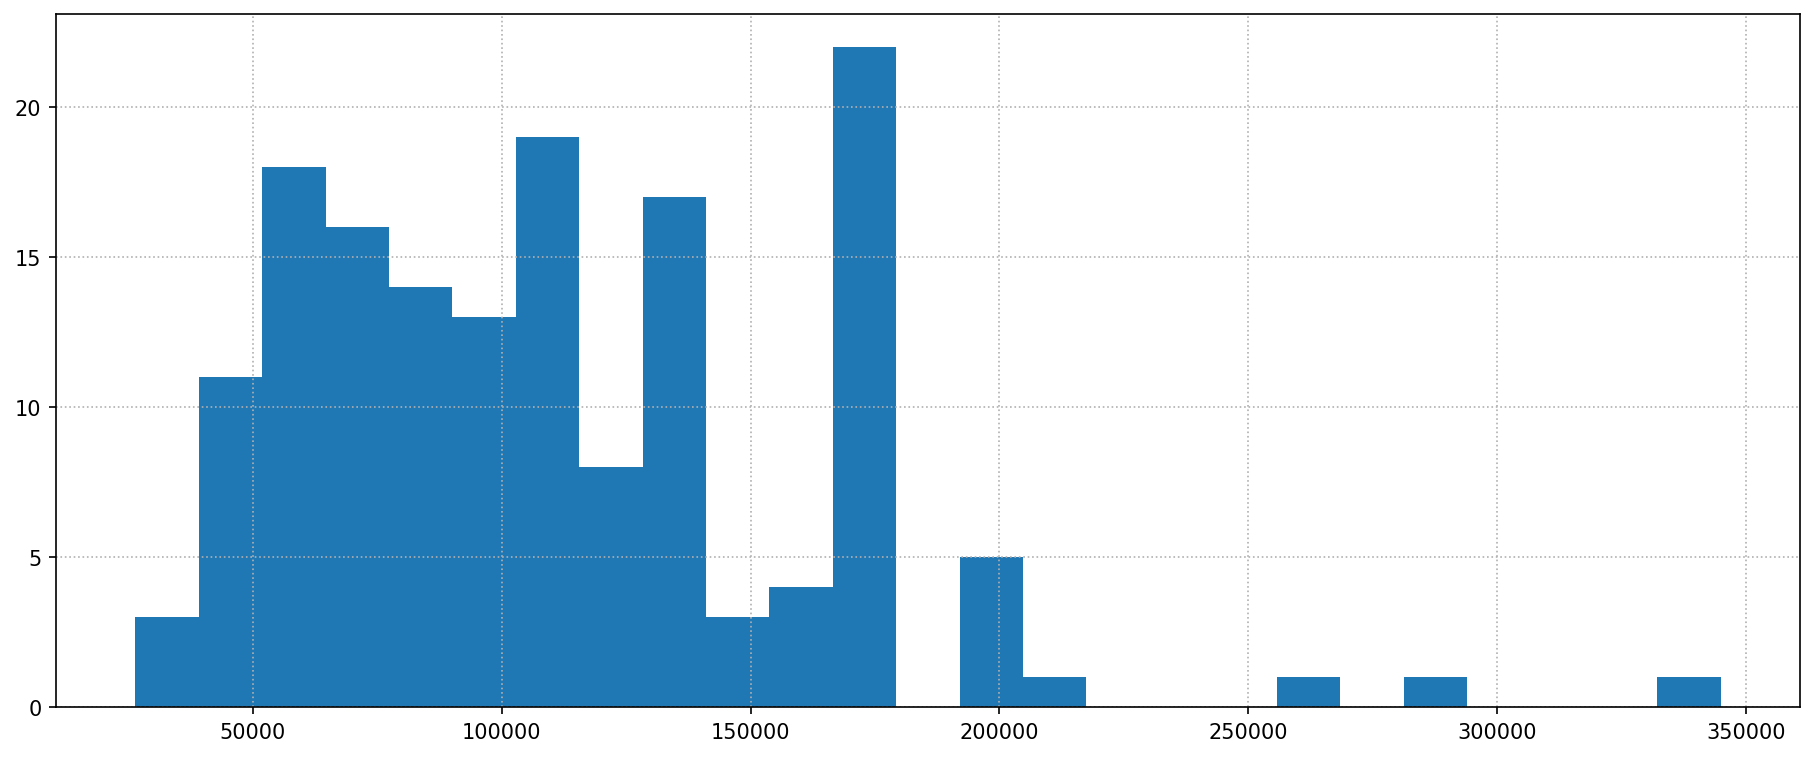

In [18]:
#Частотная диаграмма
salary_list=list(df_filtered.salary_avg.dropna())
plt.figure(figsize=(15, 6), dpi=150)
plt.hist(salary_list, bins= 25)
plt.grid(linestyle=':')
plt.show()

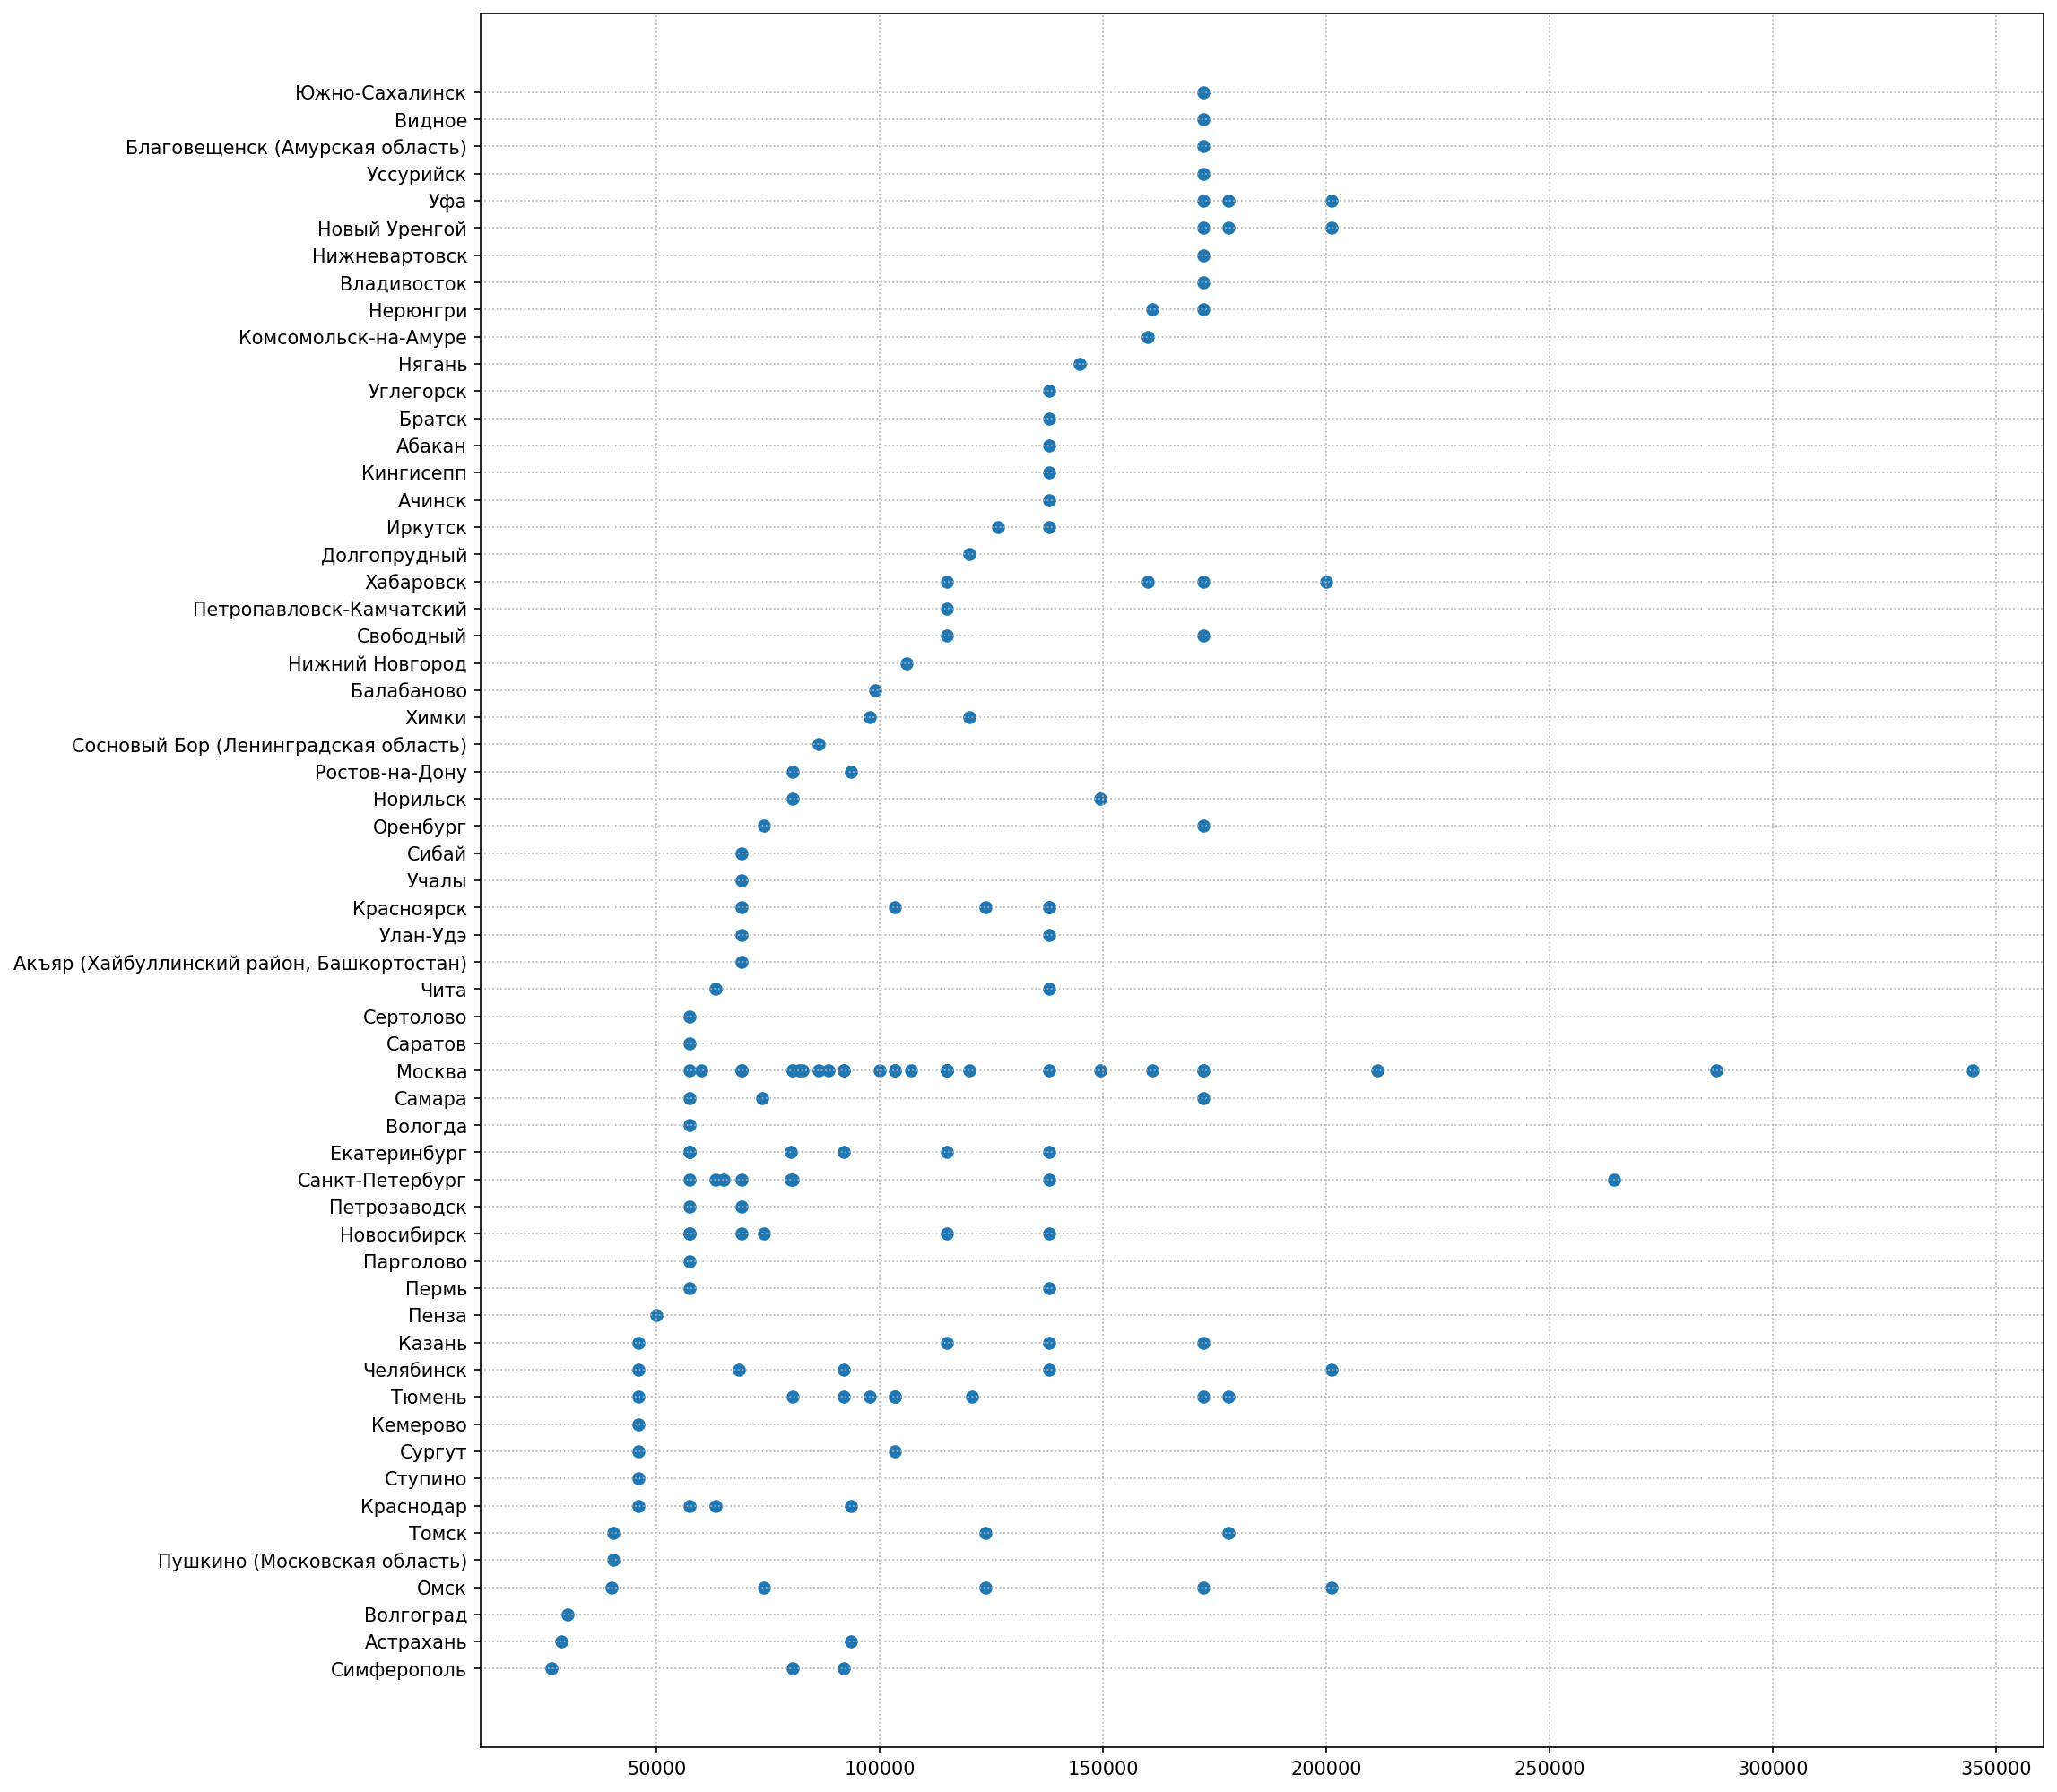

In [19]:
#Точечная диаграмма по городам
plt.figure(figsize=(15, 2+(df_filtered['area'].nunique()/4)), dpi=150)
df_filtered.query('salary_avg>0 and area==area')['salary_avg']
plt.scatter(df_filtered.query('salary_avg>0 and area==area')['salary_avg'],df_filtered.query('salary_avg>0 and area==area')['area'])
plt.grid(linestyle=':')
plt.show()

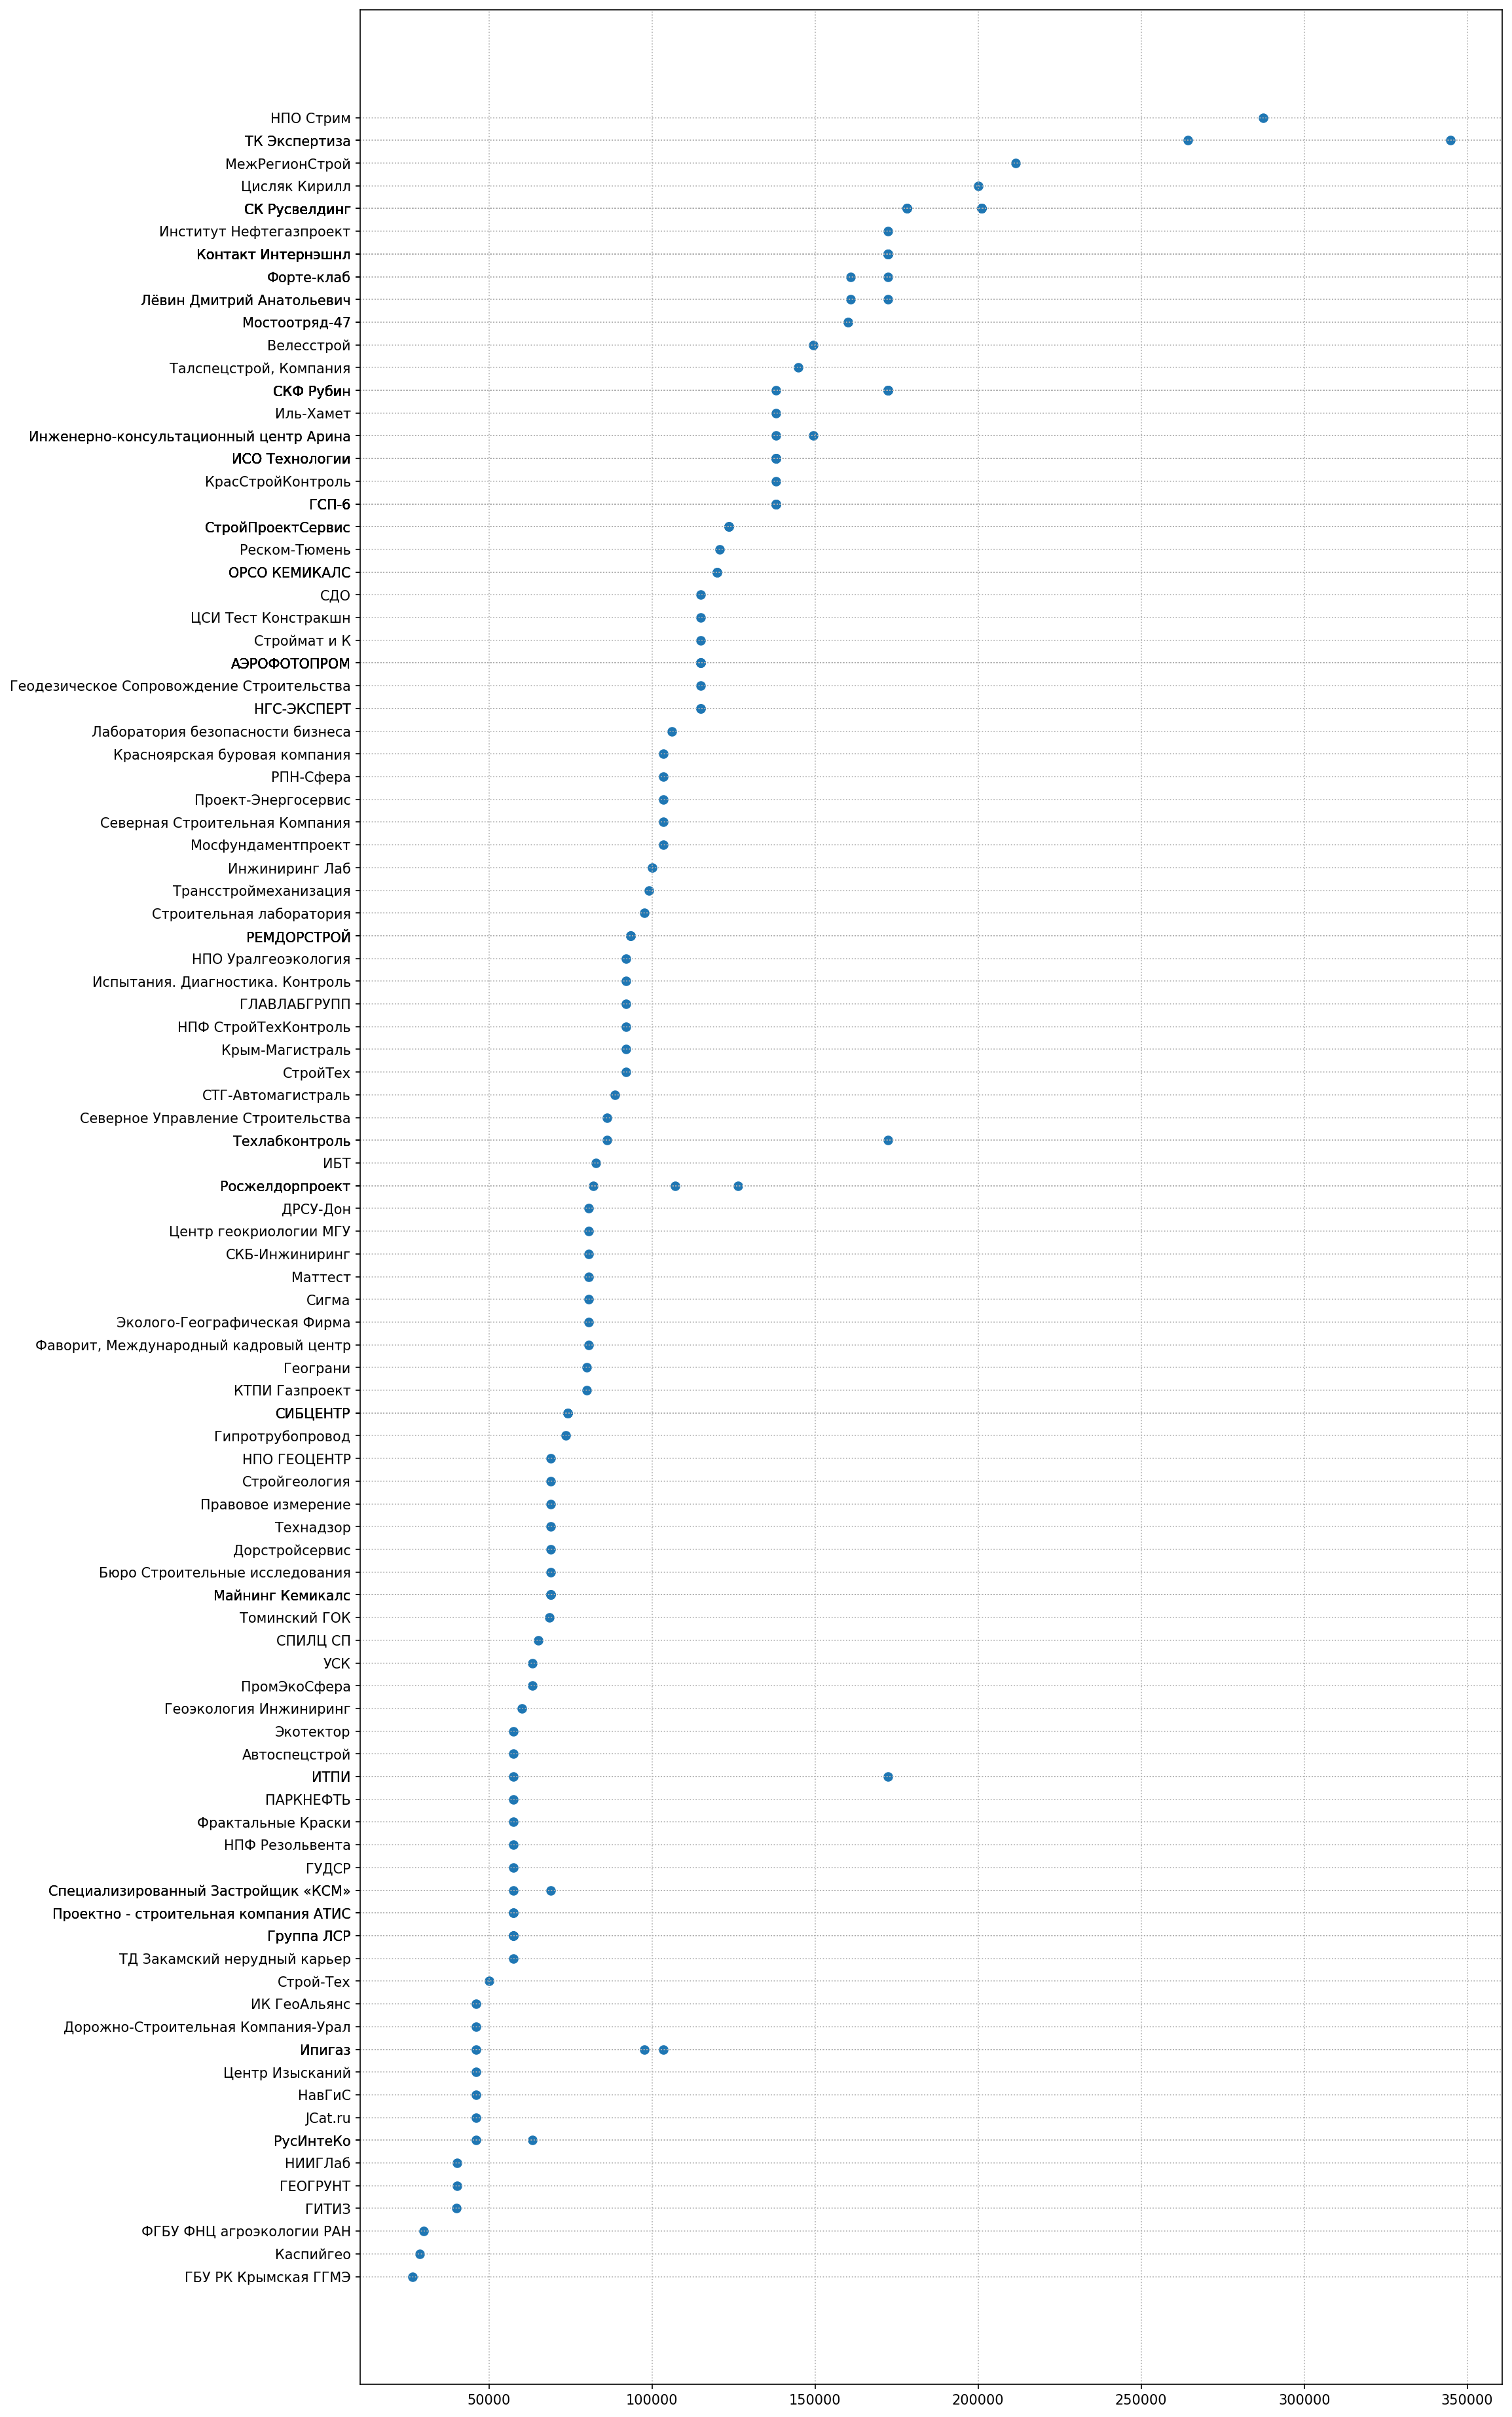

In [20]:
#Точечная диаграмма по работодателям
plt.figure(figsize=(15, len(df_filtered.query('salary_avg>0')['salary_avg'])/5), dpi=150)
df_filtered.query('salary_avg>0')['salary_avg']
df_filtered['address']=df_filtered['address'].fillna('Не указан')
plt.scatter(df_filtered.query('salary_avg>0')['salary_avg'],df_filtered.query('salary_avg>0')['employer'])
y_labels=df_filtered.query('salary_avg>0')['employer']
plt.yticks(y_labels)
plt.grid(linestyle=':')
plt.show()

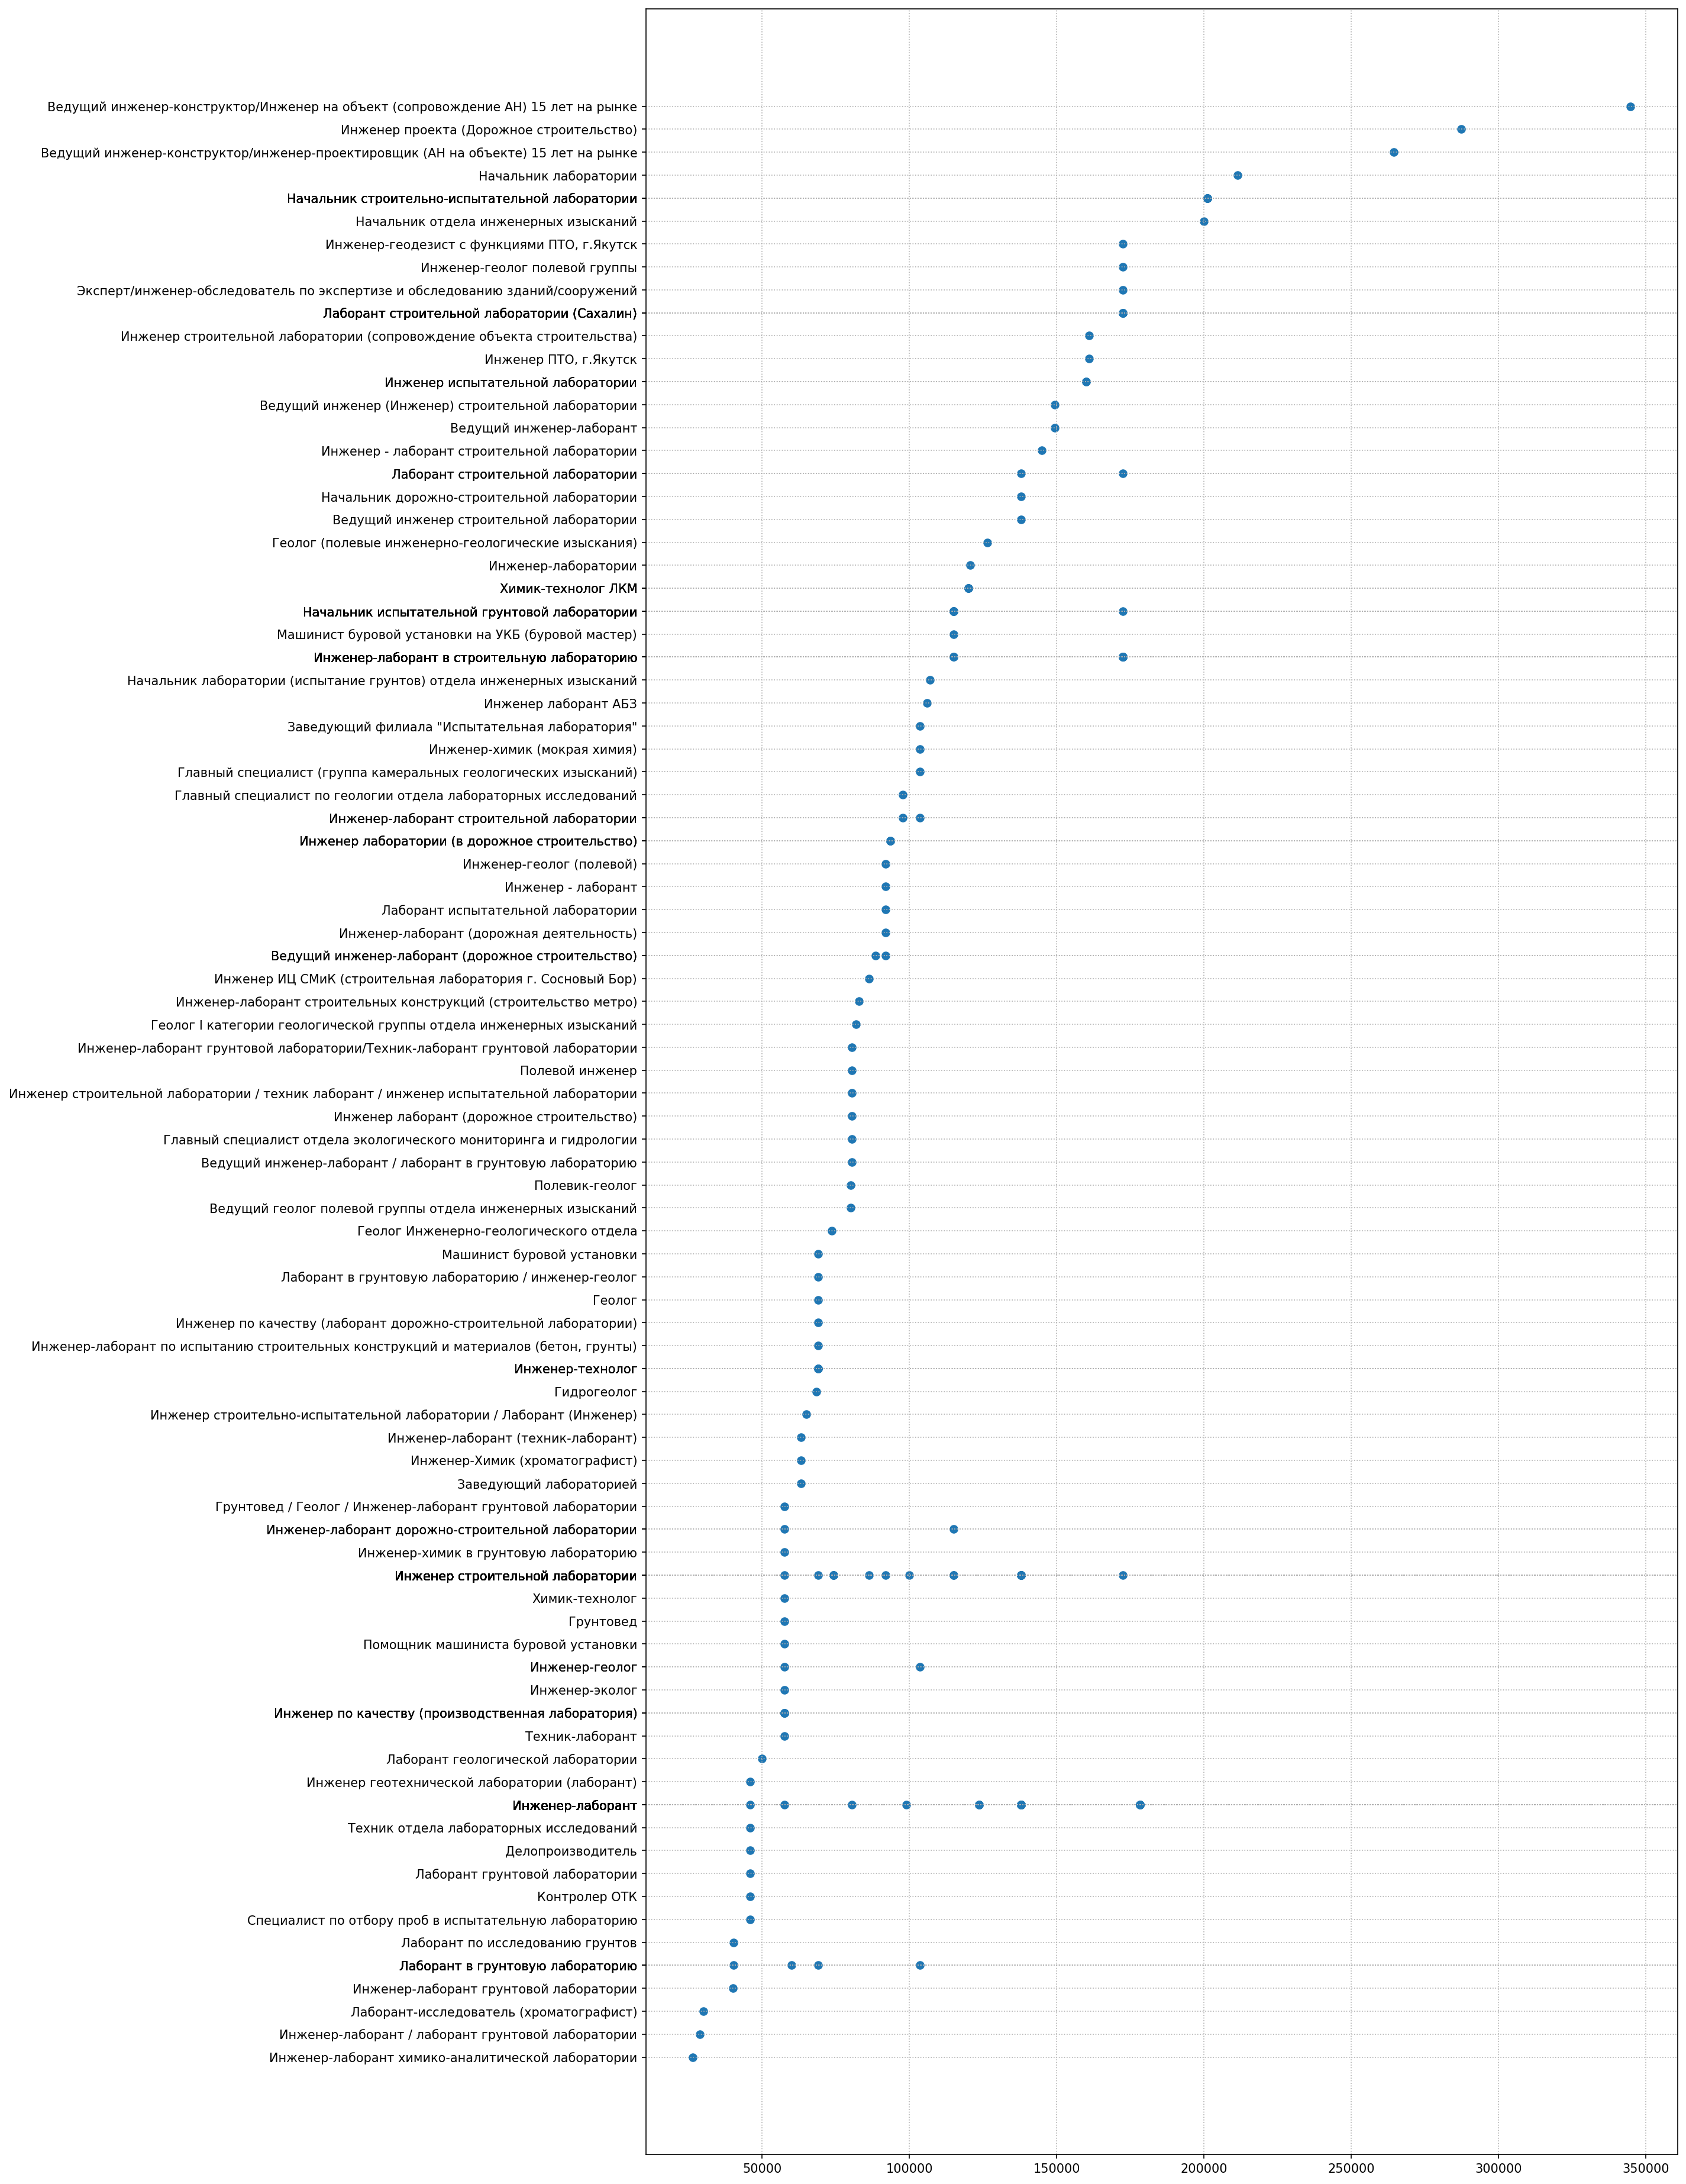

In [21]:
#Точечная диаграмма по названиям позиций
plt.figure(figsize=(15, len(df_filtered.query('salary_avg>0')['name'])/5), dpi=150)
plt.scatter(df_filtered.query('salary_avg>0')['salary_avg'],df_filtered.query('salary_avg>0')['name'])
y_labels=df_filtered.query('salary_avg>0')['name']
plt.yticks(y_labels)
plt.grid(linestyle=':')
plt.show()

In [8]:
#Кнопка подсчета перцентилей

def run_charts(ev):
    display(Javascript('IPython.notebook.execute_cells([16])'))

button5 = widgets.Button(description="Показать зарплаты")
button5.on_click(run_charts)
display(button5)

Button(description='Показать зарплаты', style=ButtonStyle())

<IPython.core.display.Javascript object>

In [22]:
#Подсчет перцентилей
perc=str(df_filtered.salary_avg.quantile([.25,.5,.75,.9]))
print('\nПерцентили по заработной плате(руб. gross): \n')
print(perc.split('Name')[0])
#df_filtered.to_excel(text+'.xlsx')
#print('Данные выгружены в файл '+text+'.xlsx') 


Перцентили по заработной плате(руб. gross): 

0.25     68965.517241
0.50    103448.275862
0.75    137931.034483
0.90    172413.793103

